# EDA de audio

### Objetivo
Entender el rango de duraciones, volúmenes, tipos de sonidos, presencia de ruido, etc., antes de extraer features más complejas o aplicar modelos.

Qué analizamos en un audio:

- Duración
- Amplitud / volumen.
- Espectrogramas
- Formas de onda.
- Análisis de pitch (para analizar entonación, melodía, etc.,  para distinguir voces, instrumentos, emociones).
- Distribución de clases (si es clasificación)
- etc.


In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [6]:
# Audios descargados de https://pixabay.com/sound-effects/search/voice/
mp3_files = ['audio/medieval-gamer-voice.mp3', 'audio/acoustic-guitar.mp3', 
             'audio/woman-voice-very-nice.mp3', 'audio/train-voice.mp3']

In [7]:
# Listas para almacenar la información de los audios

amplitudes = []
labels = []
duraciones = []
sample_rates = []

# Carga y procesa cada archivo MP3
for mp3_file in mp3_files:
    try:
        y, sr = librosa.load(mp3_file, sr=None, mono=True)
        # y = np.asarray(y).flatten()[:100000]  # Limitar a 100,000 muestras

        n_samples = int(5 * sr)      # máximo 5 segundos
        if len(y) > n_samples:
            y_fixed = y[:n_samples]  # recorta
        # else:
        #    pad = n_samples - len(y)
        #    y_fixed = np.pad(y, (0, pad))  # rellena con ceros
        
        dur = librosa.get_duration(y=y_fixed, sr=sr)
        duraciones.append(dur)
        amplitudes.append(y_fixed)
        sample_rates.append(sr)
        labels.append(mp3_file)
        print(f"Procesado: {mp3_file}")
    except Exception as e:
        print(f"Error al procesar {mp3_file}: {e}")

if not amplitudes:
    raise ValueError("No se cargaron datos de los archivos MP3.")


Procesado: audio/medieval-gamer-voice.mp3
Procesado: audio/acoustic-guitar.mp3
Procesado: audio/woman-voice-very-nice.mp3
Procesado: audio/train-voice.mp3


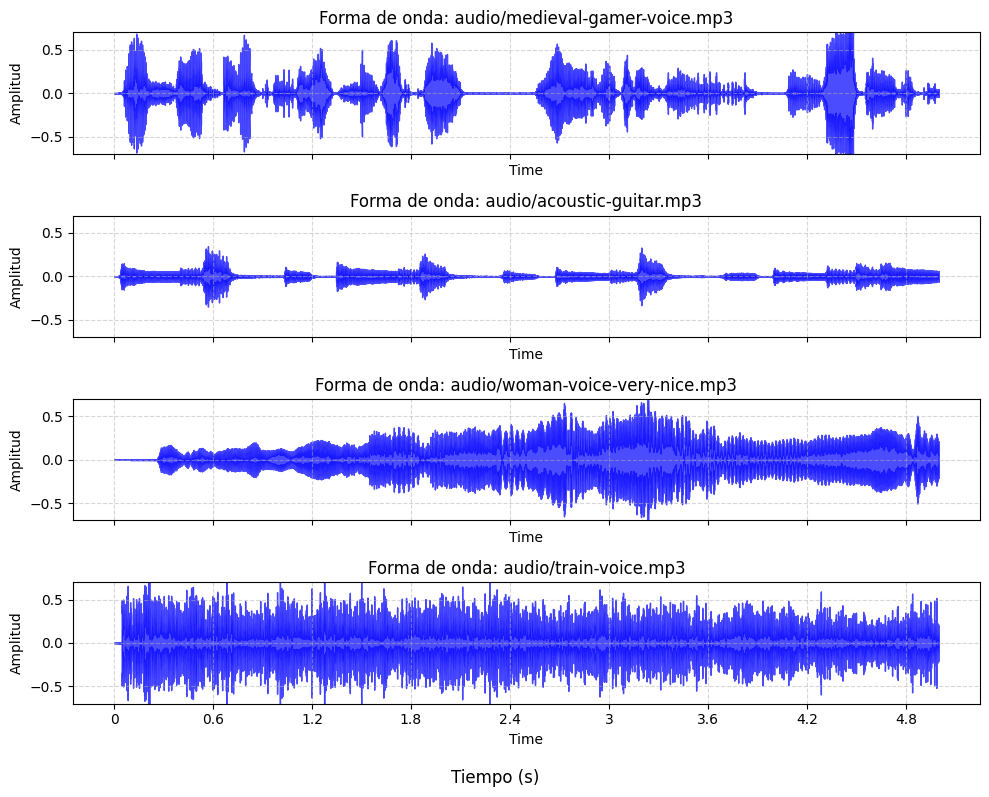

In [8]:
# Formas de onda

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 8), sharex=True)

for i, (y, sr, label, ax) in enumerate(zip(amplitudes, sample_rates, labels, axes)):
    librosa.display.waveshow(y, sr=sr, ax=ax, color='blue', alpha=0.7)
    ax.set_title(f'Forma de onda: {label}')
    ax.set_ylabel('Amplitud')
    ax.set_ylim(-0.7, 0.7)
    ax.grid(True, linestyle='--', alpha=0.5)

fig.supxlabel('Tiempo (s)')
plt.tight_layout()
plt.show()


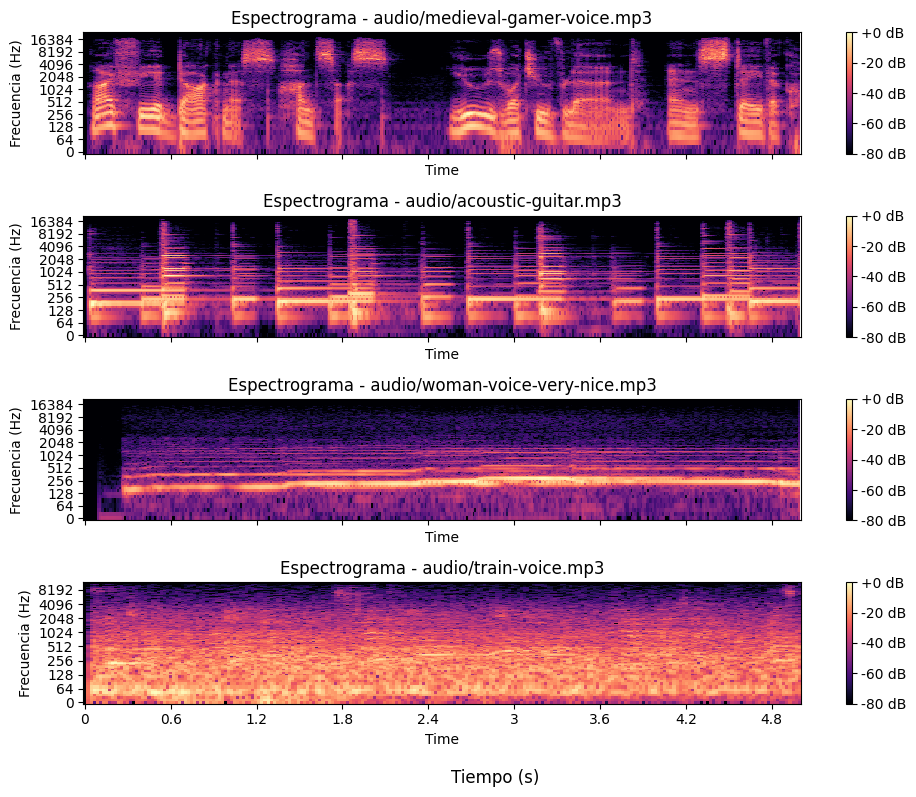

In [9]:
# Espectogramas
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 8), sharex=True)

for i, (y, sr, label, ax) in enumerate(zip(amplitudes, sample_rates, labels, axes)):
    # Calcular el STFT y convertir a decibeles
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    
    spec = librosa.display.specshow(D, y_axis='log', x_axis='time', sr=sr, ax=ax) #, cmap='viridis')
    ax.set_title(f'Espectrograma - {label}')
    ax.set_ylabel('Frecuencia (Hz)')
    fig.colorbar(spec, ax=ax, format='%+2.0f dB')

# Etiqueta común para el eje x
fig.supxlabel('Tiempo (s)')
plt.tight_layout()
plt.show()

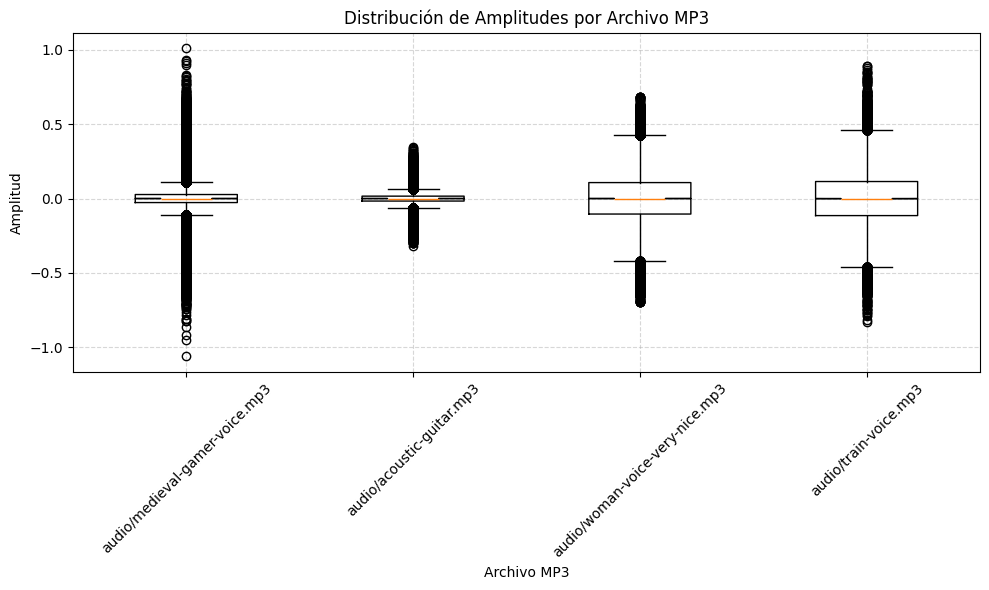


Estadísticas para audio/medieval-gamer-voice.mp3:
 - Media: 0.0000
 - Mediana: -0.0000
 - Desviación estándar: 0.1052
 - Mínimo: -1.0591
 - Máximo: 1.0098

Estadísticas para audio/acoustic-guitar.mp3:
 - Media: -0.0000
 - Mediana: -0.0000
 - Desviación estándar: 0.0379
 - Mínimo: -0.3216
 - Máximo: 0.3483

Estadísticas para audio/woman-voice-very-nice.mp3:
 - Media: 0.0002
 - Mediana: -0.0000
 - Desviación estándar: 0.1685
 - Mínimo: -0.6968
 - Máximo: 0.6841

Estadísticas para audio/train-voice.mp3:
 - Media: -0.0002
 - Mediana: -0.0005
 - Desviación estándar: 0.1783
 - Mínimo: -0.8269
 - Máximo: 0.8918


In [10]:
# Boxplot de amplitudes
plt.figure(figsize=(10, 6))
plt.boxplot(amplitudes, tick_labels=labels, notch=True, vert=True)
plt.title('Distribución de Amplitudes por Archivo MP3')
plt.xlabel('Archivo MP3')
plt.ylabel('Amplitud')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Estadísticas básicas
for i, amp in enumerate(amplitudes):
    print(f"\nEstadísticas para {labels[i]}:")
    print(f" - Media: {np.mean(amp):.4f}")
    print(f" - Mediana: {np.median(amp):.4f}")
    print(f" - Desviación estándar: {np.std(amp):.4f}")
    print(f" - Mínimo: {np.min(amp):.4f}")
    print(f" - Máximo: {np.max(amp):.4f}")